# Line detection

$\mathrm{LiMe}$ includes an [intensity threshold](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2631518/) algorithm to confirm the presence of lines prior to their measurement. In this guide, we will show how the user can access these functions.

Let's start by loading an observation:

/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


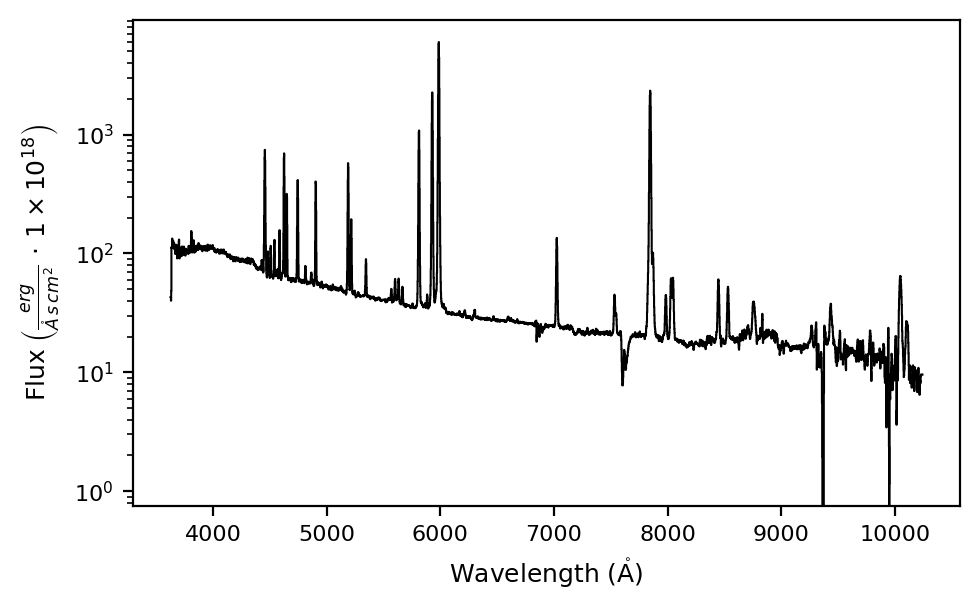

In [1]:
import numpy as np
from astropy.io import fits
from pathlib import Path
import lime

# State the input files
obsFitsFile = '../0_resources/spectra/gp121903_osiris.fits'
cfgFile = '../0_resources/long_slit.toml'

# Spectrum parameters
z_obj = 0.19531
norm_flux = 1e-18

# Create the observation object
gp_spec = lime.Spectrum.from_file(obsFitsFile, instrument='osiris', redshift=z_obj, norm_flux=norm_flux)
gp_spec.plot.spectrum(log_scale=True)

The first step is to obtain an estimate of the continuum, as demonstrated in the [previous guide](../2_guides/3_continuum_fitting.ipynb):

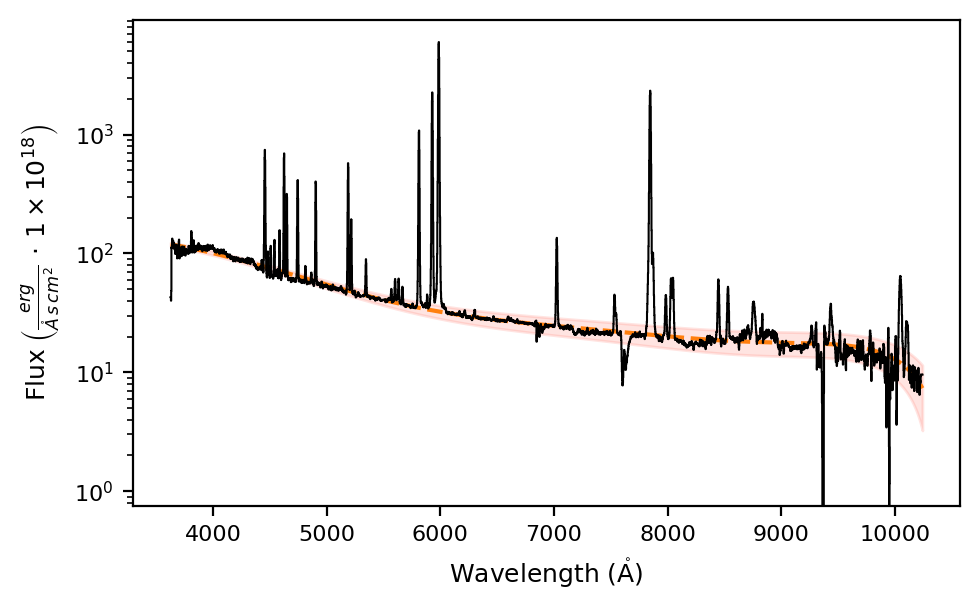

In [2]:
# Fit the object continuum:
gp_spec.fit.continuum(degree_list=[3, 6, 6], emis_threshold=[3, 2, 1.5])

# Plot the observation with the fitted continuum and its mean standard deviation
gp_spec.plot.spectrum(show_cont=True, log_scale=True)

Now, we retrieve a table of candidate lines for the observation wavelength range:

In [3]:
candidate_lines = gp_spec.retrieve.lines_frame()
candidate_lines[0:10]
print(f'{candidate_lines.index.size} candidate lines')

65 candidate lines


As you can see, this is a very large list.

It is recommended to index this table to include only the lines relevant to your astronomical study.

For the current guide, we will use it in the $\tt{lime.Spectrum.infer.peaks\_troughs}$ function to match the theoretical wavelengths to the observed peaks:

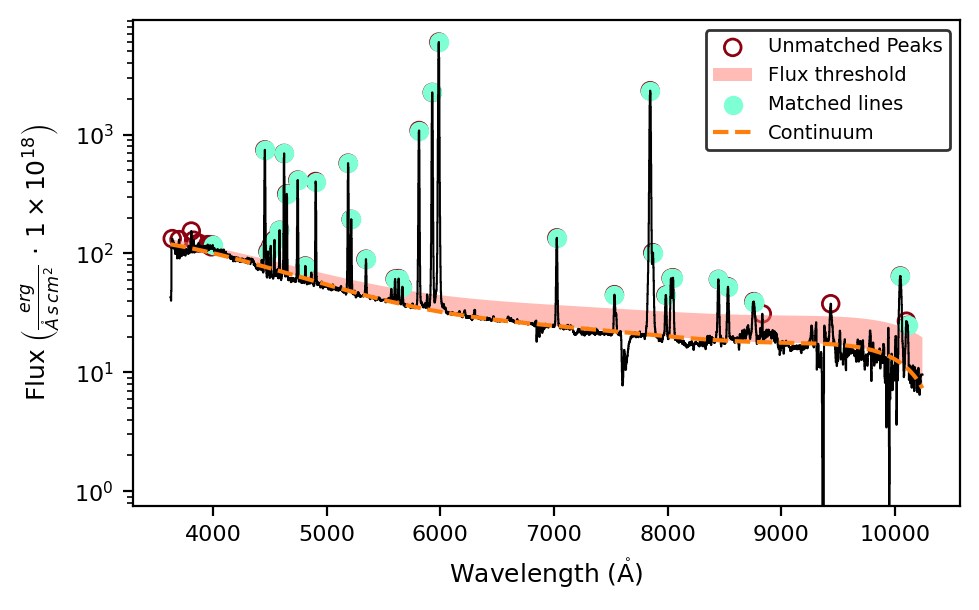

            wavelength     wave_vac           w1           w2           w3  \
Ne5_3345A  3345.400000  3346.400000  3334.246902  3338.698612  3339.336871   
O2_3726A   3725.974000  3727.092000  3665.750000  3694.260000  3719.555437   
O2_3729A   3728.756000  3729.875000  3665.750000  3694.260000  3722.335373   
H1_3750A   3750.092000  3751.217000  3664.503848  3675.720417  3743.650991   
H1_3771A   3770.571000  3771.701000  3758.000441  3763.017925  3764.111082   
H1_3798A   3797.838000  3798.976000  3780.949179  3792.078244  3791.352932   
H1_3835A   3835.324000  3836.472000  3823.148476  3829.538777  3828.803029   
Ne3_3869A  3869.000000  3870.160000  3848.429950  3858.099497  3862.448279   
He1_3889A  3888.584917  3889.747508  3842.087829  3861.282614  3882.014483   
H1_3889A   3888.988000  3890.151000  3842.087829  3861.282614  3882.416885   

                    w4           w5           w6                latex_label  \
Ne5_3345A  3351.463129  3352.089476  3356.565009    $[NeV]3345

In [4]:
matched_lines = gp_spec.infer.peaks_troughs(candidate_lines, emission_type=True, sigma_threshold=3, plot_steps=True, log_scale=True)
print(matched_lines[0:10])
print(f'{matched_lines.index.size} lines detected')

By setting ``plot_steps=True``, we can visualize the steps of the iteration. The remaining arguments adjust the peak detection argument:

* The ``emission_shape=True`` sets the detection to peaks.
* The shaded area represents the ``sigma_threshold`` times ``spectrum.cont_std``, above which peaks are detected.
* The filled circles represent the matched peaks, while the empty pale circles represent unmatched peaks. The ``width_tol`` argument sets the minimum number of pixels between peaks/troughs, with a default value of 5.

To inspect the bands, you can use the ``bands`` argument in the $\tt{lime.Spectrum.plot.spectrum}$ function:


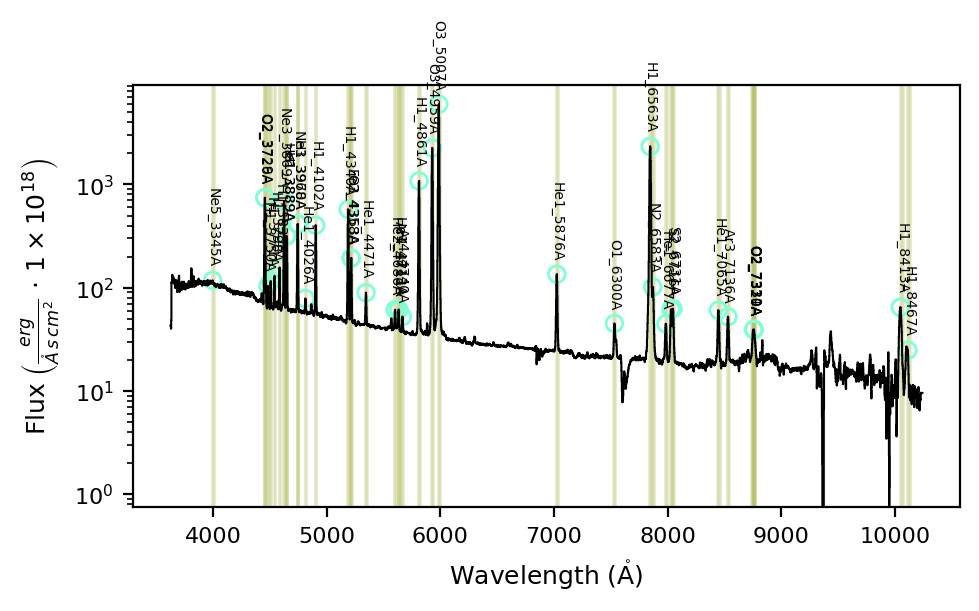

In [5]:
gp_spec.plot.spectrum(bands=matched_lines, log_scale=True)

## Takeaways
* After fitting the continuum for your observation, you can run the $\tt{lime.Spectrum.infer.peaks\_troughs}$ function to detect peaks/troughs above/below a specified multiple of the continuum flux standard deviation.
* This function compares the detected peaks/troughs against the transition wavelengths in the input bands.
* The user should ensure that the input bands are appropriate for single or blended lines.
* The function arguments can be adjusted to meet the user’s needs. You can read the function documentation in the [API](https://lime-stable.readthedocs.io/en/latest/reference/API.html).
